## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability



In [1]:
# To get started, let's import our libraries.
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [4]:
print('Number of rows in the dataset=', df.shape[0])

Number of rows in the dataset= 294478


c. The number of unique users in the dataset.

In [5]:
print('Number of unique users in the dataset =', df['user_id'].nunique())


Number of unique users in the dataset = 290584


d. The proportion of users converted.

In [6]:
print('Proportion of users converted =', df['converted'].mean()*100,'%')

Proportion of users converted = 11.96591935560551 %


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
df.groupby(['group','landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [8]:
print('The number of times the `new_page` and `treatment` don\'t line up =', 1928+1965)

The number of times the `new_page` and `treatment` don't line up = 3893


f. Do any of the rows have missing values?
No

In [9]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

It is also opvious that there are no missing values from the df.info() above.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2_control = df[(df['group']=='control') &  (df['landing_page'] == 'old_page')]
df2_treatment = df[(df['group']=='treatment') &  (df['landing_page'] == 'new_page')]


df2 = df2_control.append(df2_treatment)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [14]:
a = df2['user_id']
a.dtype


dtype('int64')

In [15]:
# Finding the duplicate using 'sort'
#Source: http://p-nand-q.com/python/algorithms/searching/duplicate.html
def find_duplicate_sorted(A):
    for index, item in enumerate(sorted(A)):
        if index == 0:
            prev = item
            
        elif prev == item:
            return item
            
        else:
            prev = item

In [16]:
find_duplicate_sorted(a)

773192

c. What is the row information for the repeat **user_id**? 

In [17]:
df2.loc[df2['user_id'] == 773192]
#Source: https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
# Note: I have tried many ways to drop the row # 2893 but when I recheck for duplicates I find the two rows still exist in
# the data fram. Finally this way worked!

In [19]:
# Source: https://www.ritchieng.com/pandas-removing-columns/
rows = [2893]
df2.drop(rows, axis=0, inplace=True)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [21]:
# To make sure that the row was deleted
df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [22]:
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [23]:
print('Probability of an individual converting regardless of the page they receive =', df2['converted'].mean())

Probability of an individual converting regardless of the page they receive = 0.11959708724499628


In [24]:
df2_control = df2[(df2['group']=='control')]
df2_treatment = df2[(df2['group']=='treatment')]

In [25]:
df2_control.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145274 entries, 0 to 294476
Data columns (total 5 columns):
user_id         145274 non-null int64
timestamp       145274 non-null object
group           145274 non-null object
landing_page    145274 non-null object
converted       145274 non-null int64
dtypes: int64(2), object(3)
memory usage: 6.7+ MB


b. Given that an individual was in the `control` group, what is the probability they converted?

In [26]:
print('Probability of an individual from the control group to convert =', df2_control['converted'].mean())

Probability of an individual from the control group to convert = 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [27]:
print('Probability of an individual from the treatment group to convert =', df2_treatment['converted'].mean())

Probability of an individual from the treatment group to convert = 0.11880806551510564


In [28]:
df2.groupby('landing_page').describe().converted

,count,mean,std,min,25%,50%,75%,max
landing_page,,,,,,,,
new_page,145310.0,0.118808,0.323564,0.0,0.0,0.0,0.0,1.0
old_page,145274.0,0.120386,0.325414,0.0,0.0,0.0,0.0,1.0


d. What is the probability that an individual received the new page?

In [29]:
print('the probability that an individual received the new page =', len(df2_treatment)/len(df2) )

the probability that an individual received the new page = 0.5000619442226688


In [30]:
# Calculating the observed difference in the original file
Observed_diff = df2_treatment['converted'].mean() - df2_control['converted'].mean()
Observed_diff

-0.0015782389853555567

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Your answer goes here.**

### Preliminary recommendations:
The mean conversion rate and its standard deviation for the “new page” and the “old page” are summarized in this table.

    Treatment	Mean	   sd
    new_page	0.118808	0.323564
    old_page	0.120386	0.325414

My preliminary analysis indicates that there is no significant difference between the old and the new pages. At least, there is no evidence that one page is better than the other.
Based on the analysis conducted so far I would recommend not to change to the new page and save the switching costs.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

$$ Null-hypothesis (H_0): $$ The conversion rate of the old page is better than or equal to the conversion rate of the new page 
 (**$p_{new}$** <= **$p_{old}$**)

$$ Alternative-hypothesis (H_1): $$ The conversion rate of the new page is better than the conversion rate of the old page (**$p_{new}$** > **$p_{old}$**)

>In other words:

Null-hypothesis (H_0): (**$p_{new}$** - **$p_{old}$** <= 0)

Alternative-hypothesis (H_1): (**$p_{new}$** - **$p_{old}$** > 0)



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [31]:
#  the converted rate in ab_data.csv regardless of the page
df2.converted.mean()

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [32]:
#  the converted rate in ab_data.csv regardless of the page
df2.converted.mean()

0.11959708724499628

c. What is $n_{new}$?

In [33]:
len(df2_treatment)

145310

d. What is $n_{old}$?

In [34]:
len(df2_control)

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [35]:
new_page_converted = np.random.choice([1,0], size = len(df2_treatment), p= [df2.converted.mean(), (1-df2.converted.mean())])

In [36]:
new_page_converted.shape

(145310,)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [37]:
old_page_converted = np.random.choice([1,0], size = len(df2_control), p= [df2.converted.mean(), (1-df2.converted.mean())])

In [38]:
old_page_converted.shape

(145274,)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [39]:
print('Pnew - Pold =', new_page_converted.mean() - old_page_converted.mean() )

Pnew - Pold = 0.0005555897961599943


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [40]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size = len(df2_treatment), p= [df2.converted.mean(), (1-df2.converted.mean())])
    old_page_converted = np.random.choice([1,0], size = len(df2_control), p= [df2.converted.mean(), (1-df2.converted.mean())])
     
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

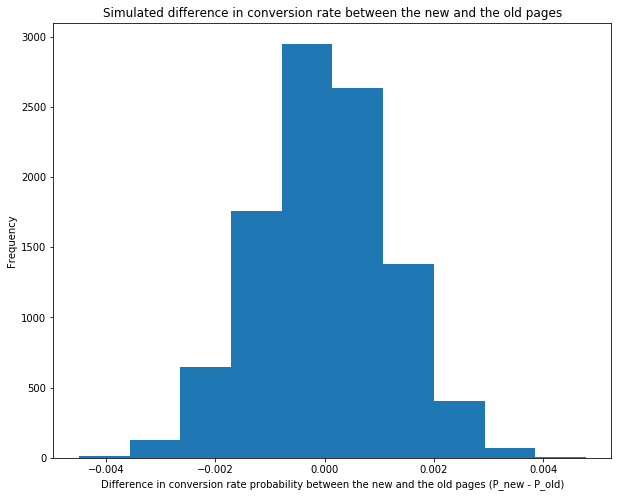

In [41]:
# import matplotlip before plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Control the size of the plot
plt.rcParams['figure.figsize']=(10,8)

# Plotting a Histogram
plt.hist(p_diffs)
plt.xlabel('Difference in conversion rate probability between the new and the old pages (P_new - P_old)')
plt.ylabel('Frequency')
plt.title('Simulated difference in conversion rate between the new and the old pages');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [42]:
# Calculating the observed difference in the original file
Observed_diff = df2_treatment['converted'].mean() - df2_control['converted'].mean()
Observed_diff

-0.0015782389853555567

In [43]:
# The proportion of the p_diffs that are greater than the actual difference observed
p_diffs = np.array(p_diffs)
(Observed_diff < p_diffs).mean()

0.9022

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

> In part J I computed the p-value. It is the probability of observing my data or something more extreme in favor of the alternative (H1) given the null hypothesis (H0) is true. 

> Since the calculated p-value is greater than the assigned alpha (0.05) then we failed to reject the Null hypothesis (H0). 

> The conclusion is: the new page is NOT better than the old page in terms of customers' conversion rate.



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [44]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [45]:
import statsmodels.api as sm

convert_old = df2_control['converted'].sum()
convert_new = df2_treatment['converted'].sum()
n_old = len(df2_control)
n_new = len(df2_treatment)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [46]:
# I chose ( alternative='smaller' ) because I have a one tailed hypothesis where my Alternative Hypothesis is
# the control group will have a 'smaller' conversion than the treatment group
# Additional source: http://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print('z-score = {} and p-value = {}'.format(z_score, p_value))

z-score = 1.3109241984234394 and p-value = 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

## **Put your answer here.**

The Z-Score represents the distance between a measured point and the mean of a population, where the population is normally distributed and this distance is measured in units of the population’s standard deviation. Z-Score is another way to test a hypothesis. 
Using the Z-Table, the Z-Score is converted to the p-value, which represents the area under the curve that meets the tested hypothesis (the Null hypothesis). 
The p-value indicates the probability that the null hypothesis can adequately explain the results. Accordingly, the smaller the p-value the more significant the Alternative hypothesis (H1) is.

In this example, the p-value (0.905) is way larger than the accepted level of Type I error (alpha = 0.05). Accordingly, this indicates that we cannot reject the Null Hypothesis.

The data in hand are not supporting the claim that the new page will lead to higher conversion rate than the old page.

The p-value calculated in this method (0.905) is quite equal to the p-value calculated in the previous section (0.898) this will lead to the same conclusions (both methods agree with each other). 

However, there is a disadvantage in the previous method (the simulation method) that is: when the random.seed is not controlled, the p-value might suffer slight change each time we run the simulation.
I performed this test many times and each time had a different p-value. However, there was no much difference.



Source: http://www.statisticshowto.com/probability-and-statistics/z-score/



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

## Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [47]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [48]:
# Create dummy ab_page column
# I will create only one dummy as I will drop the other one anyway in the model
df['ab_page'] = pd.get_dummies(df['group'])['treatment'] 

In [49]:
# Creating the intercept
df['intercept'] = 1

In [50]:
df.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [51]:
import statsmodels.api as sm;

# Logistic regression Model

log_mod = sm.Logit(df['converted'], df[['intercept', 'ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Jul 2018   Pseudo R-squ.:               7.093e-06
Time:                        13:03:48   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.2161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9887      0.008   -248.297      0.000      -2.004      -1.973
ab_page       -0.0140      0.011     -1.237      0.216      -0.036       0.008
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

> The difference in the computed p-values between the previous two models and the logistic regression model "could" be explained as follows:

> The null hypothesis in a logistic regression is that there is no relationship of any direction between the variables (Source: http://www.biostathandbook.com/multiplelogistic.html). Accordingly, in the logistic regression model the tested hypothesis are:
Null hypothesis (H0): P_new - P_old = 0 &
Alternative hypothesis (H1): P_new - P_old != 0. 
While in the previous models the H0: P_new - P_old <= 0 and H1: P_new - P_old > 0. 

> This means that:
The logistic regression is a two tailed test while the previous models were one tailed. Accordingly, this will lead to changes in the computed p-value and also change in the direction of the interpreted relationship based on the sign of the coefficient in the logistic regression.
A one tailed p-value has a specific direction that is (it measures this assumption only): Mean_treatment - Mean_control <= 0 
(That corresponds to P_new - P_old <= 0)

> Since: P(H0) = 1 - P(H1)    ………..(1)
The p-value for the Null hypothesis will equal to 1 - the p-value of the opposite alternative hypothesis. 
(Source: http://daniellakens.blogspot.com/2015/11/the-relation-between-p-values-and.html).
And in a two tailed test we measure both assumptions:
Mean_treatment - Mean_control < 0 "or" Mean_control - Mean_treatment < 0. 
The logistic regression test will returns the best p-value among both (measured using a two tailed test). And the sign of the coefficient will indicate which direction was measured/used. 

> p-value for a two tailed test = 2 * p-value for the one tailed test ……… (2)
(Source: https://www.graphpad.com/guides/prism/7/statistics/one-tail_vs__two-tail_p_values.htm?toc=0&printWindow).
(This formula is very tricky and it is correct only when the p-value of the two tailed is < 0.5. If the p-value two tailed is > 0.5 then we reverse the relationship direction and calculate 1 - p-value then multiply it by two).

> From (1) and (2), it is expected that the p-value will be different. However, based on the findings in the previous models (p-value one tailed = 0.898), it is possible to expect that (since the direction will be reversed because P(H1) > P(H0)) the p-value in the logistic regression will be "around" (2 * (1-0.898)) = 0.204 and the coefficient will be negative (because the direction will be reversed (p-value > 0.5). 


> Difference in bootstrapping methods associated with the programmed logistic regression or our bootstrapping method will cause a slight difference in the reported p-values from expectations. However, the observed p-value for ab_page (0.216) is not that far from the expectation (0.204).

> Conclusion:
The p-value for ab_page is 0.216. This indicates that the change in treatment (new Vs old pages) has no significant impact on the model. This will also indicate that the new page is not better than the old page. We reached the same conclusion using the previous models.

NOTE: The sources mentioned here are examples.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**


> Among the common factors described in the lectures are: Novelty effect & Change aversion. Both effects are related to how current customers will react to the changes.
People respond to change differently. Some of them just like it and others just resist it. It does not depend on the content of the page or the way of the treatment. The novelty effect is when the current customers just respond positively to changes. And the change aversion is when they (current customers) respond negatively. We only know that we have a control group and a treatment group but we don’t know any information about the characteristics of these groups. It would have significantly helped this analysis if we can identify if the customer is a current (active), or inactive or just a new customer. Also, the characteristics of the participants in this study could have played a significant role in explaining their behavior. 

> One of the other important factors to consider is the revenue. That is, a change might attract more attention of high earners which will significantly increase the revenue of the company. While another change might attract low earners and repel high earners. In the second scenario an increase in the conversion rate might be reported, but it yet might be associated with low revenue. Nevertheless, it might have implications on the brand of the company. Thus it is not about the number of clicks alone, it is about how significant and meaningful these clicks were in terms of revenue. This makes me think that adding a factor (revenue per transaction) will help meaningfully interpret this analysis.

> The disadvantage of adding more factors:
First: it might make the model way too complicated to be interpreted meaningfully.
Nevertheless, we might risk the increase of collinearity between factors and accordingly this might complicate the code and the methods used.
Still, we can add more factors but yet not landing on a significant correlation.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [52]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [53]:
df_new = df_countries.set_index('user_id').join(df.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 7 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
ab_page         294478 non-null uint8
intercept       294478 non-null int64
dtypes: int64(3), object(3), uint8(1)
memory usage: 13.8+ MB


In [55]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294478 entries, 630000 to 945999
Data columns (total 7 columns):
country         294478 non-null object
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
ab_page         294478 non-null uint8
intercept       294478 non-null int64
dtypes: int64(2), object(4), uint8(1)
memory usage: 16.0+ MB


Good: No empty cells in the new file

In [56]:
## Create dummies

dummy = pd.get_dummies(df_new['country'])                                                                                                                  
df_new= df_new.join(dummy)
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1


In [57]:
# Running the logistic regression
# Using US as the base value 

log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
results = log_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366638
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               302266
Model:                          Logit   Df Residuals:                   302263
Method:                           MLE   Df Model:                            2
Date:                Wed, 25 Jul 2018   Pseudo R-squ.:               1.153e-05
Time:                        13:03:58   Log-Likelihood:            -1.1082e+05
converged:                       True   LL-Null:                   -1.1082e+05
                                        LLR p-value:                    0.2787
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9942      0.007   -298.076      0.000      -2.007      -1.981
CA            -0.0354      0.026     -1.349      0.177      -0.087       0.016
UK             0.0087      0.013      0.665      0.506      -0.017       0.034
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [58]:
# Running the logistic regression
# Using US as the base value and adding the treatment to the independent variables

log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page' ,'CA', 'UK']])
results = log_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366635
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               302266
Model:                          Logit   Df Residuals:                   302262
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Jul 2018   Pseudo R-squ.:               1.887e-05
Time:                        13:04:04   Log-Likelihood:            -1.1082e+05
converged:                       True   LL-Null:                   -1.1082e+05
                                        LLR p-value:                    0.2424
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9871      0.009   -228.148      0.000      -2.004      -1.970
ab_page       -0.0143      0.011     -1.276      0.202      -0.036       0.008
CA            -0.0354      0.026     -1.348      0.178      -0.087       0.016
UK             0.0086      0.013      0.662      0.508      -0.017       0.034
==============================================================================
"""

In [59]:
np.exp(-1.9871)

0.13709241753962706

In [60]:
# Running the logistic regression and changing the baseline to UK

log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page' ,'CA', 'US']])
results = log_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366635
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               302266
Model:                          Logit   Df Residuals:                   302262
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Jul 2018   Pseudo R-squ.:               1.887e-05
Time:                        13:04:10   Log-Likelihood:            -1.1082e+05
converged:                       True   LL-Null:                   -1.1082e+05
                                        LLR p-value:                    0.2424
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9784      0.012   -158.473      0.000      -2.003      -1.954
ab_page       -0.0143      0.011     -1.276      0.202      -0.036       0.008
CA            -0.0440      0.028     -1.586      0.113      -0.098       0.010
US            -0.0086      0.013     -0.662      0.508      -0.034       0.017
==============================================================================
"""

In [61]:
np.exp(-1.9784)

0.13829032491350698

In [62]:
# Running the logistic regression and changing the baseline to Canada

log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page' ,'UK', 'US']])
results = log_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366635
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               302266
Model:                          Logit   Df Residuals:                   302262
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Jul 2018   Pseudo R-squ.:               1.887e-05
Time:                        13:04:15   Log-Likelihood:            -1.1082e+05
converged:                       True   LL-Null:                   -1.1082e+05
                                        LLR p-value:                    0.2424
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0225      0.026    -77.726      0.000      -2.073      -1.971
ab_page       -0.0143      0.011     -1.276      0.202      -0.036       0.008
UK             0.0440      0.028      1.586      0.113      -0.010       0.098
US             0.0354      0.026      1.348      0.178      -0.016       0.087
==============================================================================
"""

In [63]:
np.exp(-2.0225)

0.13232424062050865

Country of origin did not play a significant role in predicting the conversion rate regardless if the treatment was added to the model or not. However, it is interesting to see that the intercept was always significant for the baseline country. Even when changing the baseline country. 
The intercept is interpreted as the value of the dependent variable (in this case the conversion rate) when all other variables except the baseline (when using a dummy variable) are equal to zero. The logistic regression model calculated that the conversion rate (propapelity of conversion) for the control old page in the three countries US, UK and Canada are  0.137, 0.138 and 0.132 respectively. This is not far from the previously calculated probability of an individual from the control group to convert = 0.120. However, the probability to convert is not significantly changing between the countries.

# Checking the effect of time

## Explaining logic and methodology
> It might be expected that the conversion rate changes over the day. Like conversion during the morning is different than conversion at night.

> It might be expected that during working hours less conversion will happen because working individuals will not shop online during working hours (theoretically :).

> So I will split the time to five categories: 
- Before working hours (from 4 Am to 9 Am)
- Morning shift (from 9 Am to 12 Pm)
- Afternoon shift (from 12Pm to 7 Pm)
- After work (from 7 Pm to 11 Pm)
- Night dwellers (from 11 Pm to 4Am)

> The day intervals are subjective. It is just the way I look at the day.

> Note: I cannot use time as a numeric variable. This is not logical as midnight and early hours of the day are actually near to each other. A numeric variable will show them far from each other (23 Vs 1). Nevertheless, humans' activities tend to cycle around the day with peaks in the middle. A numeric time variable will not capture that. Linear investigations are not designed to capture such behaviors.

> I will create a categorical variable for the night shifts, then I will create dummy variables for that categorical variable and re-conduct the logistic regression to see if the time can influence the conversion rate (conversion rate is significantly higher in a specific day period)

> I will also test if the new and old pages (A/B test) was influenced by the time

> It is not clear if the time is measured using local time or is it referenced to GLT. I will assume that it is measured in local times.

> US and Canada have 3 hours’ time difference between east and west costs. It is more adequate to only use the data from the UK when analyzing the impact of time. So I will perform my analysis on UK’s data only. The data from UK are adequate (n= 75325) to find statistical significance.


In [85]:
# import a needed packages
from datetime import datetime
import pandas as pd
import numpy as np

In [86]:
df_new['country'].value_counts()

US    211854
UK     75325
CA     15087
Name: country, dtype: int64

In [87]:
# Splitting the UK data
df_UK = df_new[(df_new['country']=='UK')]

In [88]:
df_UK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75325 entries, 630010 to 945994
Data columns (total 10 columns):
country         75325 non-null object
timestamp       75325 non-null object
group           75325 non-null object
landing_page    75325 non-null object
converted       75325 non-null int64
ab_page         75325 non-null uint8
intercept       75325 non-null int64
CA              75325 non-null uint8
UK              75325 non-null uint8
US              75325 non-null uint8
dtypes: int64(2), object(4), uint8(4)
memory usage: 4.3+ MB


In [89]:
df_UK.head(2)

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
630010,UK,2017-01-06 16:36:05.678507,treatment,new_page,0,1,1,0,1,0
630013,UK,2017-01-13 04:28:26.422941,control,old_page,1,0,1,0,1,0


In [90]:
# Converting timestamp to a time dtype to be able to isolate the hour from it
df_UK['timestamp'] = pd.to_datetime(df_UK['timestamp'])

D:\python\Anaconda_Installed\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
df_UK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75325 entries, 630010 to 945994
Data columns (total 10 columns):
country         75325 non-null object
timestamp       75325 non-null datetime64[ns]
group           75325 non-null object
landing_page    75325 non-null object
converted       75325 non-null int64
ab_page         75325 non-null uint8
intercept       75325 non-null int64
CA              75325 non-null uint8
UK              75325 non-null uint8
US              75325 non-null uint8
dtypes: datetime64[ns](1), int64(2), object(3), uint8(4)
memory usage: 4.3+ MB


In [92]:
# Isolating the time from the timestamp
df_UK['time'] = [d.time() for d in df_UK['timestamp']]

# Source: https://stackoverflow.com/questions/35595710/splitting-timestamp-column-into-seperate-date-and-time-columns

D:\python\Anaconda_Installed\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
df_UK.head(2)

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,time
user_id,,,,,,,,,,,
630010,UK,2017-01-06 16:36:05.678507,treatment,new_page,0,1,1,0,1,0,16:36:05.678507
630013,UK,2017-01-13 04:28:26.422941,control,old_page,1,0,1,0,1,0,04:28:26.422941


In [94]:
df_UK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75325 entries, 630010 to 945994
Data columns (total 11 columns):
country         75325 non-null object
timestamp       75325 non-null datetime64[ns]
group           75325 non-null object
landing_page    75325 non-null object
converted       75325 non-null int64
ab_page         75325 non-null uint8
intercept       75325 non-null int64
CA              75325 non-null uint8
UK              75325 non-null uint8
US              75325 non-null uint8
time            75325 non-null object
dtypes: datetime64[ns](1), int64(2), object(4), uint8(4)
memory usage: 4.9+ MB


In [95]:
# I need a code to convert the time column into another integer column before running the analysis.
# First, I need to test if my code will work
from datetime import datetime

item = '12:14:41.656659'
x = datetime.strptime( item , "%H:%M:%S.%f" ).strftime('%H')

print(x)


12


> I tested the code with many values. It looks like all is good to go

In [96]:
# Isolating the hour value using strptime
df_UK['time'] = [datetime.strptime( str(item) , "%H:%M:%S.%f" ).strftime('%H') for item in df_UK['time']]

D:\python\Anaconda_Installed\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [97]:
df_UK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75325 entries, 630010 to 945994
Data columns (total 11 columns):
country         75325 non-null object
timestamp       75325 non-null datetime64[ns]
group           75325 non-null object
landing_page    75325 non-null object
converted       75325 non-null int64
ab_page         75325 non-null uint8
intercept       75325 non-null int64
CA              75325 non-null uint8
UK              75325 non-null uint8
US              75325 non-null uint8
time            75325 non-null object
dtypes: datetime64[ns](1), int64(2), object(4), uint8(4)
memory usage: 4.9+ MB


In [98]:
df_UK.head(2)

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,time
user_id,,,,,,,,,,,
630010,UK,2017-01-06 16:36:05.678507,treatment,new_page,0,1,1,0,1,0,16
630013,UK,2017-01-13 04:28:26.422941,control,old_page,1,0,1,0,1,0,04


In [99]:
# Changing the time column from string to numeric to be able to perform operations on it
df_UK['time'] = pd.to_numeric(df_UK['time'], errors='coerce')

D:\python\Anaconda_Installed\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [100]:
# definging a function for transforming hour to a categorical value

def time_cat (x):
    if 4 <= x < 9: 
        return 'early_Morning'
    if 9 <= x < 13: 
        return 'Morning_shift'
    if 13 <= x < 19: 
        return 'Afternoon_shift'
    if 19 <= x < 23: 
        return 'After_work'
    else: 
        return 'Night_dwellers'
    
# I found directions from: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns

In [101]:
# testing the function
x = 23
time_cat(x)

'Night_dwellers'

> I tested the time_cat function with many values and it is working fine

In [102]:
df_UK['time_category'] = [time_cat(x) for x in df_UK['time']]

D:\python\Anaconda_Installed\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
df_UK.head(2)

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,time,time_category
user_id,,,,,,,,,,,,
630010,UK,2017-01-06 16:36:05.678507,treatment,new_page,0,1,1,0,1,0,16,Afternoon_shift
630013,UK,2017-01-13 04:28:26.422941,control,old_page,1,0,1,0,1,0,4,early_Morning


In [104]:
df_UK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75325 entries, 630010 to 945994
Data columns (total 12 columns):
country          75325 non-null object
timestamp        75325 non-null datetime64[ns]
group            75325 non-null object
landing_page     75325 non-null object
converted        75325 non-null int64
ab_page          75325 non-null uint8
intercept        75325 non-null int64
CA               75325 non-null uint8
UK               75325 non-null uint8
US               75325 non-null uint8
time             75325 non-null int64
time_category    75325 non-null object
dtypes: datetime64[ns](1), int64(3), object(4), uint8(4)
memory usage: 5.5+ MB


In [105]:
## Creating time dummies

time_dummy = pd.get_dummies(df_UK['time_category'])                                                                                                                  
df_UK= df_UK.join(time_dummy)
df_UK.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,time,time_category,After_work,Afternoon_shift,Morning_shift,Night_dwellers,early_Morning
user_id,,,,,,,,,,,,,,,,,
630010,UK,2017-01-06 16:36:05.678507,treatment,new_page,0,1,1,0,1,0,16,Afternoon_shift,0,1,0,0,0
630013,UK,2017-01-13 04:28:26.422941,control,old_page,1,0,1,0,1,0,4,early_Morning,0,0,0,0,1
630019,UK,2017-01-10 19:15:37.867289,control,old_page,0,0,1,0,1,0,19,After_work,1,0,0,0,0
630024,UK,2017-01-20 20:09:39.837484,treatment,new_page,0,1,1,0,1,0,20,After_work,1,0,0,0,0
630028,UK,2017-01-22 18:33:23.663348,treatment,new_page,0,1,1,0,1,0,18,Afternoon_shift,0,1,0,0,0


In [106]:
df_UK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86761 entries, 630010 to 945994
Data columns (total 17 columns):
country            86761 non-null object
timestamp          86761 non-null datetime64[ns]
group              86761 non-null object
landing_page       86761 non-null object
converted          86761 non-null int64
ab_page            86761 non-null uint8
intercept          86761 non-null int64
CA                 86761 non-null uint8
UK                 86761 non-null uint8
US                 86761 non-null uint8
time               86761 non-null int64
time_category      86761 non-null object
After_work         86761 non-null uint8
Afternoon_shift    86761 non-null uint8
Morning_shift      86761 non-null uint8
Night_dwellers     86761 non-null uint8
early_Morning      86761 non-null uint8
dtypes: datetime64[ns](1), int64(3), object(4), uint8(9)
memory usage: 6.7+ MB


In [114]:
df_UK.head(5)

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,time,time_category,After_work,Afternoon_shift,Morning_shift,Night_dwellers,early_Morning
user_id,,,,,,,,,,,,,,,,,
630010,UK,2017-01-06 16:36:05.678507,treatment,new_page,0,1,1,0,1,0,16,Afternoon_shift,0,1,0,0,0
630013,UK,2017-01-13 04:28:26.422941,control,old_page,1,0,1,0,1,0,4,early_Morning,0,0,0,0,1
630019,UK,2017-01-10 19:15:37.867289,control,old_page,0,0,1,0,1,0,19,After_work,1,0,0,0,0
630024,UK,2017-01-20 20:09:39.837484,treatment,new_page,0,1,1,0,1,0,20,After_work,1,0,0,0,0
630028,UK,2017-01-22 18:33:23.663348,treatment,new_page,0,1,1,0,1,0,18,Afternoon_shift,0,1,0,0,0


In [108]:
len(df_UK)

86761

> I dont know why the number of rows increased after creating the dummies!!! 

In [109]:
df_UK.drop_duplicates(inplace=True)

In [110]:
len(df_UK)

74929

> This is not the number of rows I am expecting. Yet, it is more safe to conduct the analysis now.

In [111]:
# Running the logistic regression and using 'early_morning' as the baseline

log_mod = sm.Logit(df_UK['converted'], df_UK[['intercept', 'Morning_shift', 'Afternoon_shift', 'After_work', 'Night_dwellers' ]])
results = log_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.368384
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:                74929
Model:                          Logit   Df Residuals:                    74924
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 Jul 2018   Pseudo R-squ.:               3.914e-05
Time:                        13:19:25   Log-Likelihood:                -27603.
converged:                       True   LL-Null:                       -27604.
                                        LLR p-value:                    0.7063
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -1.9878      0.024    -81.218      0.000      -2.036      -1.940
Morning_shift       0.0038      0.037      0.104      0.917      -0.068       0.076
Afternoon_shift     0.0244      0.033      0.736      0.462      -0.041       0.089
After_work          0.0043      0.037      0.118      0.906      -0.068       0.076
Night_dwellers     -0.0245      0.035     -0.702      0.483      -0.093       0.044
===================================================================================
"""

> The time intervals are not playing any role in increasing conversion

In [112]:
df_UK.head(2)

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,time,time_category,After_work,Afternoon_shift,Morning_shift,Night_dwellers,early_Morning
user_id,,,,,,,,,,,,,,,,,
630010,UK,2017-01-06 16:36:05.678507,treatment,new_page,0,1,1,0,1,0,16,Afternoon_shift,0,1,0,0,0
630013,UK,2017-01-13 04:28:26.422941,control,old_page,1,0,1,0,1,0,4,early_Morning,0,0,0,0,1


In [113]:
# Running the logistic regression and using 'early_morning' as the baseline and adding the A/B test

log_mod = sm.Logit(df_UK['converted'], df_UK[['intercept', 'ab_page', 'Morning_shift', 'Afternoon_shift', 'After_work', 'Night_dwellers' ]])
results = log_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.368384
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:                74929
Model:                          Logit   Df Residuals:                    74923
Method:                           MLE   Df Model:                            5
Date:                Wed, 25 Jul 2018   Pseudo R-squ.:               3.943e-05
Time:                        13:21:28   Log-Likelihood:                -27603.
converged:                       True   LL-Null:                       -27604.
                                        LLR p-value:                    0.8241
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -1.9893      0.027    -74.025      0.000      -2.042      -1.937
ab_page             0.0029      0.022      0.128      0.898      -0.041       0.047
Morning_shift       0.0038      0.037      0.103      0.918      -0.068       0.076
Afternoon_shift     0.0243      0.033      0.735      0.463      -0.041       0.089
After_work          0.0044      0.037      0.119      0.906      -0.068       0.076
Night_dwellers     -0.0245      0.035     -0.703      0.482      -0.093       0.044
===================================================================================
"""

> Time intervals are not playing a significant role in this experiment. 

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])